# Regress This
## Exercise 1: Wisconsin Breast Cancer Dataset

**Regress This** is a weekly working group dedicated to investigating statisical inference and machine learning techniques.

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29

Wisconson Breast Cancer site listed above contains 3 datasets each with different information. 

In [283]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [284]:
%matplotlib inline
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os
# from sklearn import 

The dataset comes unlabeled, and consists of a CSV of values, here's the mapping below:

Some background with regards to terminology -- some of these being high will point to cancer while others will point to being benign. 

- Clump thickness: Benign cells tend to be grouped in monolayers, while cancerous cells are often grouped in multilayers. 

- Uniformity of cell size/shape: Cancer cells tend to vary in size and shape. That is why these parameters are valuable in determining whether the cells are cancerous or not. 

- Marginal adhesion: Normal cells tend to stick together. Cancer cells tends to loos this ability. So loss of adhesion is a sign of malignancy. 

- Single epithelial cell size: Is related to the uniformity mentioned above. Epithelial cells that are significantly enlarged may be a malignant cell. 

- Bare nuclei: This is a term used for nuclei that is not surrounded by cytoplasm (the rest of the cell). Those are typically seen in benign tumours. 

- Bland Chromatin: Describes a uniform "texture" of the nucleus seen in benign cells. In cancer cells the chromatin tend to be more coarse. 

- Normal nucleoli: Nucleoli are small structures seen in the nucleus. In normal cells the nucleolus is usually very small if visible at all. In cancer cells the nucleoli become more prominent, and sometimes there are more of them. 

In [285]:
names = ['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion', 'epithelial_cell_size', 
         'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv('wisconsin-breast-cancer.data', names=names)

Let's look at some samples that are benign vs. some samples classified as malignant

In [286]:
df[df['class'] == 2].head(10)

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2
10,1035283,1,1,1,1,1,1.0,3,1,1,2


In [287]:
df[df['class'] == 4].head(10)

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
5,1017122,8,10,10,8,7,10.0,9,7,1,4
12,1041801,5,3,3,3,2,3.0,4,4,1,4
14,1044572,8,7,5,10,7,9.0,5,5,4,4
15,1047630,7,4,6,4,6,1.0,4,3,1,4
18,1050670,10,7,7,6,4,10.0,4,1,2,4
20,1054590,7,3,2,10,5,10.0,5,4,4,4
21,1054593,10,5,5,3,6,7.0,7,10,1,4
23,1057013,8,4,5,1,2,NaN,7,3,1,4
25,1065726,5,2,3,4,2,7.0,3,6,1,4
32,1072179,10,7,7,3,8,5.0,7,4,3,4


Right away we can see some obvious difference, notably that a lot of the values appear to be higher in the malignant group.  I dislike the arbitrary "2" and "4" as classification units, so let's change those to some real labels.

In [288]:
df['class'] = df['class'].map({2: 'benign', 4: 'malignant'})

In [289]:
df.head(10)

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,benign
5,1017122,8,10,10,8,7,10.0,9,7,1,malignant
6,1018099,1,1,1,1,2,10.0,3,1,1,benign
7,1018561,2,1,2,1,2,1.0,3,1,1,benign
8,1033078,2,1,1,1,2,1.0,1,1,5,benign
9,1033078,4,2,1,1,2,1.0,2,1,1,benign


Let's look at some plots to see what features really stick out.

Let's remove the ID columns since we don't really need them, and drop the '?'.  A weird issue is that these question mark values conver the column from ints to strings which causes issues down the line.

EDIT: I just find/replace the question mark in the data, much easier to deal with.

In [290]:
sub_df = df.drop('id', axis=1)

In [291]:
# sub_df.dropna(axis=0, inplace=True)
sub_df.replace('NaN', -99999, inplace=True)

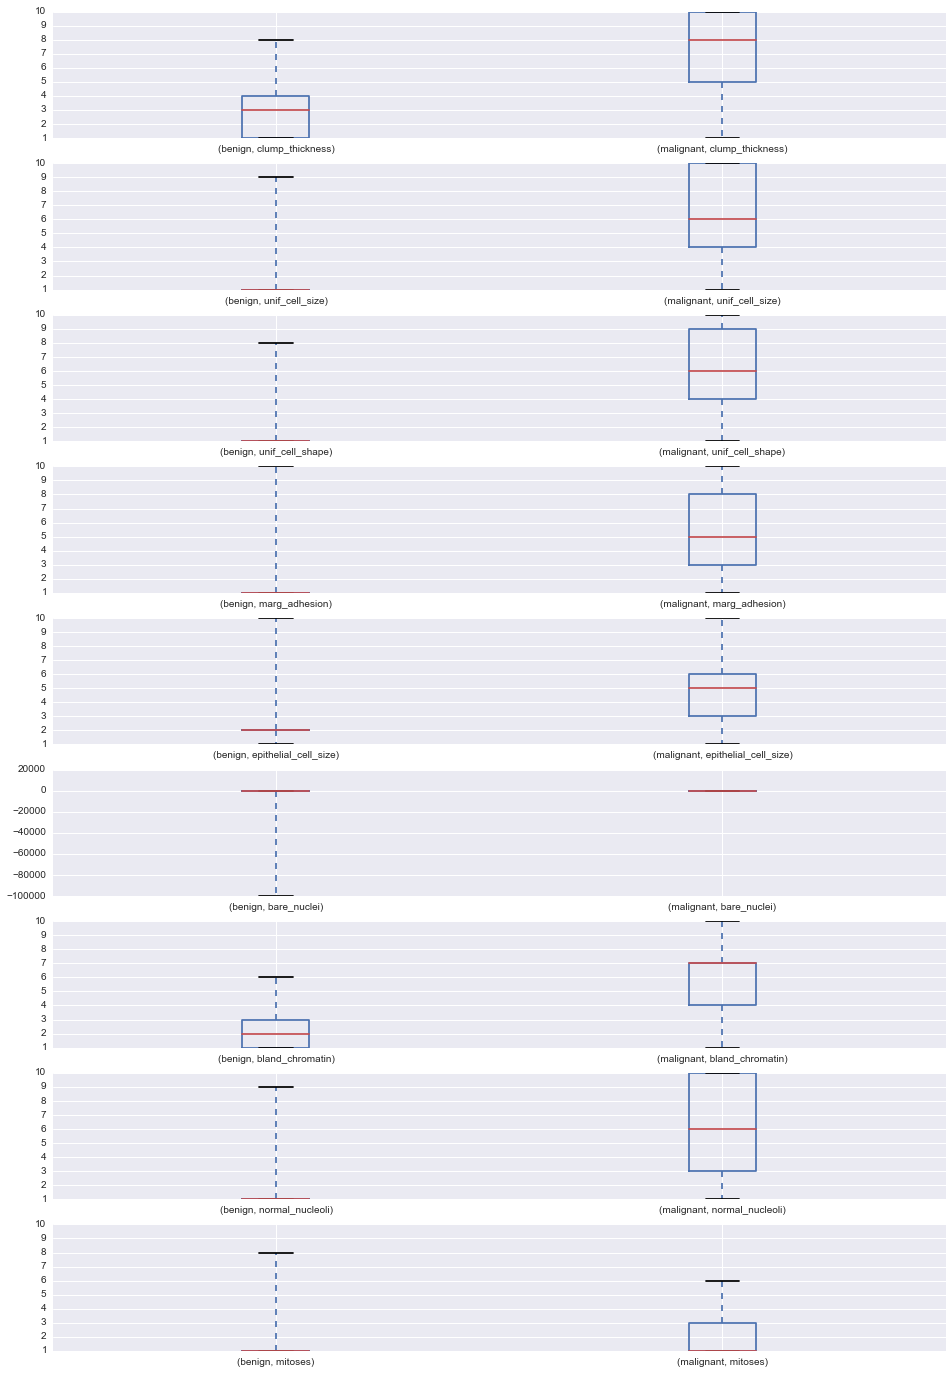

In [292]:
f, axes = plt.subplots(len(sub_df.columns)-1, figsize=(16, 24))
for i, col in enumerate([x for x in sub_df.columns if x != 'class']):
    sub_df[[col,'class']].groupby('class').boxplot('class', ax=axes[i])

In [293]:
malignant = sub_df[sub_df['class'] == 'malignant']
benign = sub_df[sub_df['class'] == 'benign']

# Learning Time

Labeled data is typically split into the matrix of features, $X$, and the labels, $y$

In [294]:
cols = sub_df.drop('class', axis=1).columns
X = sub_df.drop('class', axis=1)
y = sub_df['class']

Normalization to $0$ mean and unit variance

In [295]:
from sklearn import preprocessing

In [296]:
# X = preprocessing.normalize(X)

In [297]:
X

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
5,8,10,10,8,7,10.0,9,7,1
6,1,1,1,1,2,10.0,3,1,1
7,2,1,2,1,2,1.0,3,1,1
8,2,1,1,1,2,1.0,1,1,5
9,4,2,1,1,2,1.0,2,1,1


Pick a model

In [298]:
from sklearn import cross_validation
from sklearn import svm

In [299]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=0)

In [300]:
X_train.shape, y_train.shape

((559, 9), (559,))

In [301]:
X_test.shape, y_test.shape

((140, 9), (140,))

In [302]:
svc = svm.SVC(kernel='linear', C=1)
clf = svc.fit(X_train, y_train)

In [303]:
clf.score(X_test, y_test)   

0.94999999999999996

## Feature reduction

In [304]:
from sklearn.feature_selection import RFECV
from sklearn.cross_validation import StratifiedKFold

In [305]:
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y, 2),
              scoring='accuracy')
rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 5


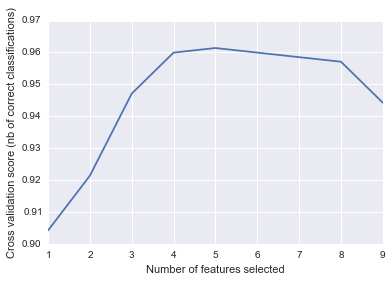

In [306]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [307]:
rfecv.score(X_test, y_test)

0.97857142857142854

In [308]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [309]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC())),
  ('classification', RandomForestClassifier())
])
clf.fit(X_train, y_train)

Pipeline(steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
        prefit=False, thresho...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [310]:
clf.score(X_test, y_test)

0.9642857142857143

In [311]:
sfm = SelectFromModel(LinearSVC())

In [312]:
sfm.fit(X_train, y_train)

SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
        prefit=False, threshold=None)

In [313]:
df_Xtrain = pd.DataFrame(X_train, columns=cols)
df_Xtrain.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
293,10,4,4,6,2,10.0,2,3,1
62,9,10,10,1,10,8.0,3,3,1
485,1,1,1,3,1,3.0,1,1,1
422,4,3,3,1,2,1.0,3,3,1
332,5,2,2,2,2,1.0,2,2,1


In [314]:
df_fsm = pd.DataFrame(sfm.transform(X_train))
df_fsm.head()

,0,1,2,3,4
0,10.0,4.0,6.0,2.0,1.0
1,9.0,10.0,1.0,3.0,1.0
2,1.0,1.0,3.0,1.0,1.0
3,4.0,3.0,1.0,3.0,1.0
4,5.0,2.0,2.0,2.0,1.0


Based on the labels, SelectFromModel chose unif_cell_size, epithelial_cell_size, bare_nuclei, normal_nucleoli, and mitoses as criical features.

In [315]:
crit_features = ['unif_cell_size', 'epithelial_cell_size', 'bare_nuclei', 'normal_nucleoli', 'mitoses']

Since random forest did well, it's worth trying out GradientBoosting

In [316]:
from sklearn.ensemble import GradientBoostingClassifier

In [317]:
clf = GradientBoostingClassifier()

In [318]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [319]:
clf.score(X_test, y_test)

0.98571428571428577

92% on the default training data is great! Let's add it to our pipeline of feature selection

In [320]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC())),
  ('classification', GradientBoostingClassifier())
])
clf.fit(X_train, y_train)

Pipeline(steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
        prefit=False, thresho...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))])

In [321]:
clf.score(X_test, y_test)

0.97142857142857142

We beat the author's accuracy (from 1992), which basically means we're geniuses.

Save the best scoring classifier using Pickle

In [322]:
import pickle

In [323]:
with open('clf-GBC.pickle', 'w') as f:
    pickle.dump(clf, f)

# Classification with Neighbors


In [324]:
from sklearn import neighbors

In [325]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [326]:
clf.score(X_test, y_test)

0.98571428571428577

In [327]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC())),
  ('classification', neighbors.KNeighborsClassifier())
])
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.95714285714285718


# Classification with SVM

In [328]:
from sklearn import svm

In [329]:
clf = svm.SVC(kernel='linear')

In [330]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [331]:
clf.score(X_test, y_test)

0.94999999999999996